## Package imports

In [2]:

# Backbone imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
# Single Cell imports
import anndata
import scanpy as sc
#import scrublet as scr
#import harmonypy
#from pybiomart import Server

import warnings
warnings.filterwarnings(action="ignore")


## Package Settings

In [3]:

sc.settings.verbosity = 3
#sc.settings.writedir()
sc.logging.print_header()
%matplotlib inline


scanpy==1.8.2 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.7


In [4]:

# Directories and required files

data_dir = Path("C:/Users/gperry/OneDrive - The Jackson Laboratory/Documents/GSBE Project - meeting recordings/molecule_files")

#load dataset
# hy_bc is completed subclustering with data cleaning and batch correction- use this to save time
hy_bc = sc.read("C:/Users/gperry/OneDrive - The Jackson Laboratory/Documents/GSBE Project - meeting recordings/molecule_files/hy_bc.h5ad", cache = True)


In [5]:
hy_bc

AnnData object with n_obs × n_vars = 5122 × 27013
    obs: 'processed_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mitochondrial', 'log1p_total_counts_mitochondrial', 'pct_counts_mitochondrial', 'total_counts_hemoglobin', 'log1p_total_counts_hemoglobin', 'pct_counts_hemoglobin', 'total_counts_ribosomal', 'log1p_total_counts_ribosomal', 'pct_counts_ribosomal', 'total_counts_sex_linked', 'log1p_total_counts_sex_linked', 'pct_counts_sex_linked', 'total_counts_is_human', 'log1p_total_counts_is_human', 'pct_counts_is_human', 'scrublet_putative_doublet', 'scrublet_score', 'n_genes', 'dataset', 'cell_type', 'data_type', 'chemistry', 'leiden'
    var: 'species', 'hemoglobin', 'mitochondrial', 'ribosomal', 'x_linked', 'y_linked', 'sex_linked', 'proliferation', 'exclude_from_highly_variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', '

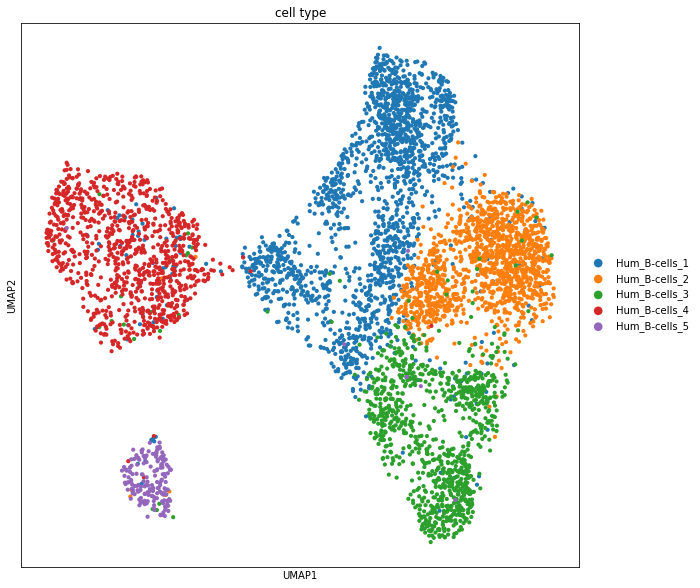

In [6]:

# check leiden on global clusters- 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.scatter(hy_bc, ax=ax, basis="umap", size=70, color="cell_type")


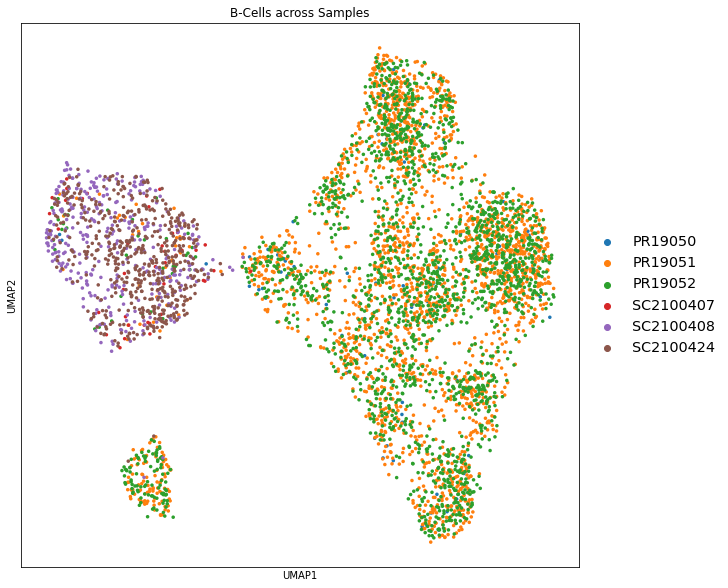

In [7]:

# check leiden on sample ids- 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.umap(hy_bc, ax=ax, color="processed_id", legend_loc="right margin", legend_fontsize = "x-large", size=50, title ="B-Cells across Samples")


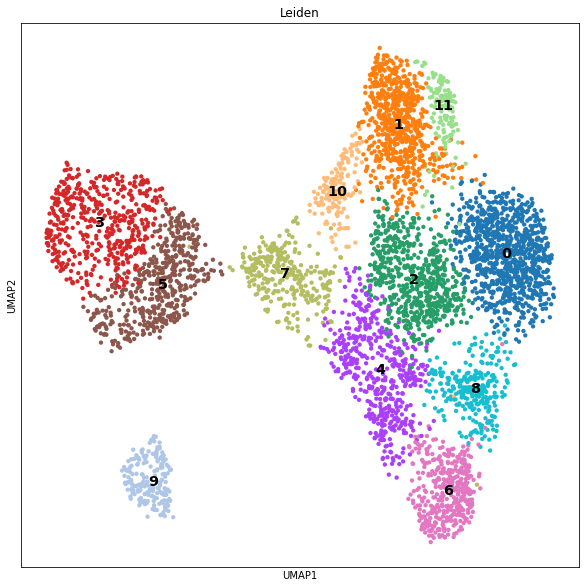

In [8]:

# check leiden- 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.umap(hy_bc, ax=ax, color="leiden", legend_loc="on data", legend_fontsize = "x-large", size=75, title ="Leiden")


In [9]:
# re-cluster leiden to see if it cleans up loose points

sc.tl.leiden(hy_bc,resolution=.2, restrict_to=("leiden",("11","1")))


running Leiden clustering
    finished: found 12 clusters and added
    'leiden_R', the cluster labels (adata.obs, categorical) (0:00:00)


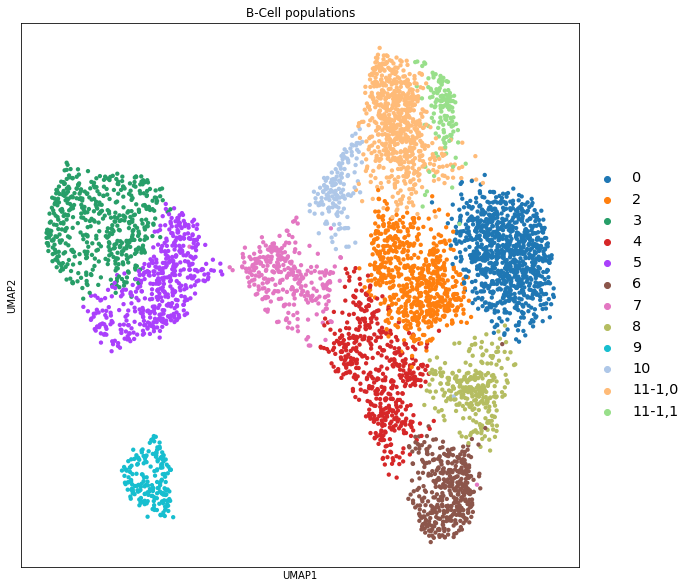

In [10]:

# check re-clustered leiden

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.umap(hy_bc, ax=ax, color="leiden_R", legend_loc="right margin", legend_fontsize = "x-large", size=75, title ="B-Cell populations")


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


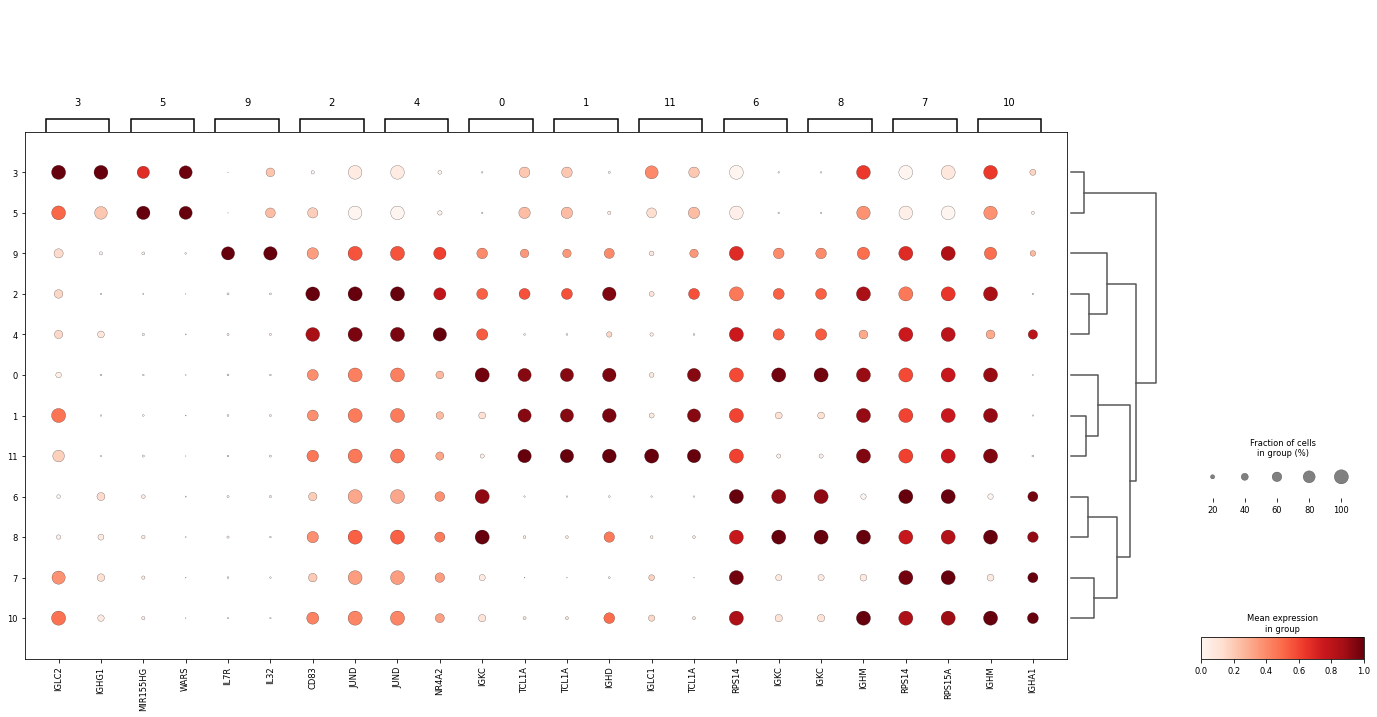

In [11]:

# produce dotplot to view highly expressed genes across clusters n_genes = 2

fig, ax = plt.subplots(1, 1, figsize=(24, 12))
sc.pl.rank_genes_groups_dotplot(hy_bc, ax=ax, n_genes=2, use_raw=False,standard_scale="var")
fig.savefig("C:/Users/gperry/OneDrive - The Jackson Laboratory/Documents/GSBE Project - meeting recordings/figures/B-CellSubclusters/Bcell_Dotplot_n2.png")


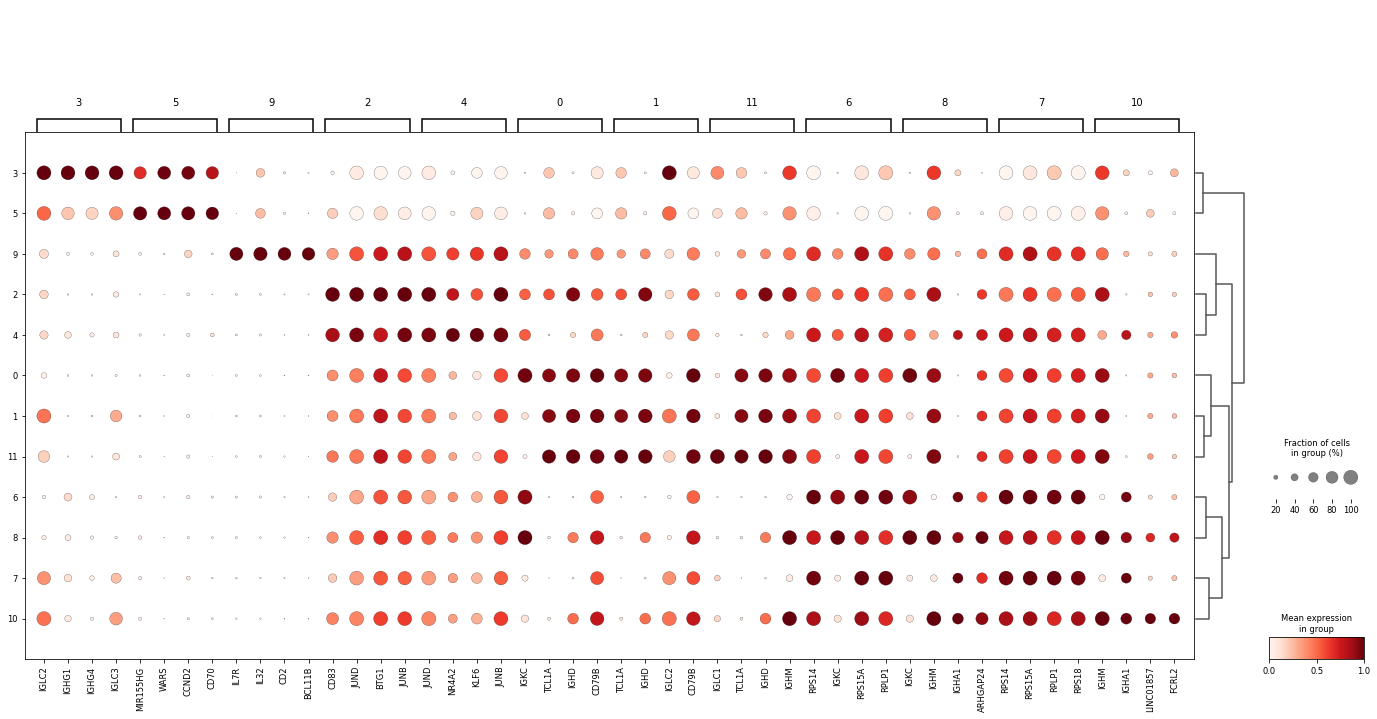

In [12]:

# produce dotplot to view highly expressed genes across clusters n_genes = 4

fig, ax = plt.subplots(1, 1, figsize=(24, 12))
sc.pl.rank_genes_groups_dotplot(hy_bc, ax=ax, n_genes=4, use_raw=False,standard_scale="var")
fig.savefig("C:/Users/gperry/OneDrive - The Jackson Laboratory/Documents/GSBE Project - meeting recordings/figures/B-CellSubclusters/Bcell_Dotplot_n4.png")


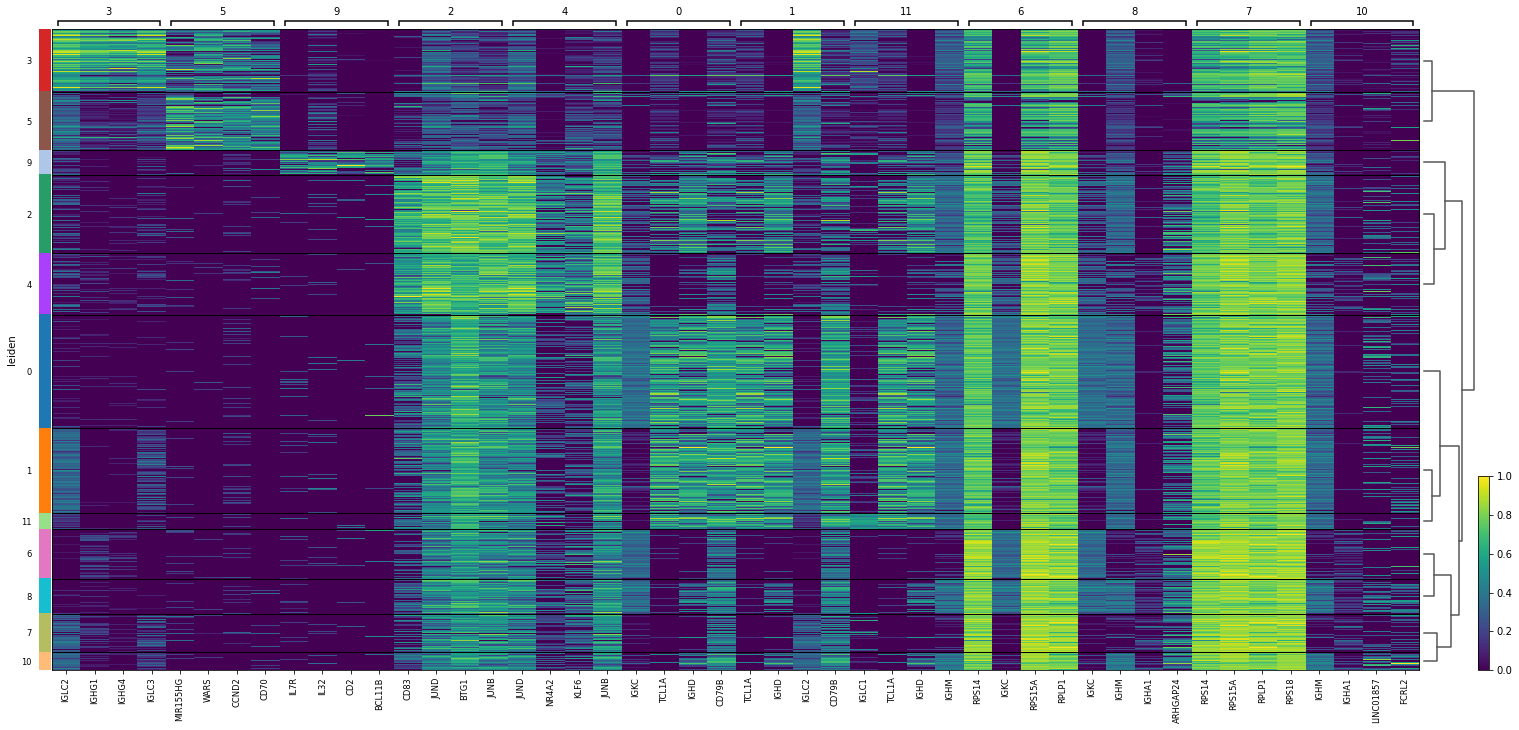

In [13]:

# preduce heatmap - similar to dot plot, but maybe not as useful

fig=sc.pl.rank_genes_groups_heatmap(hy_bc, figsize=(26, 12), n_genes=4, use_raw=False, show_gene_labels=True,standard_scale="var")

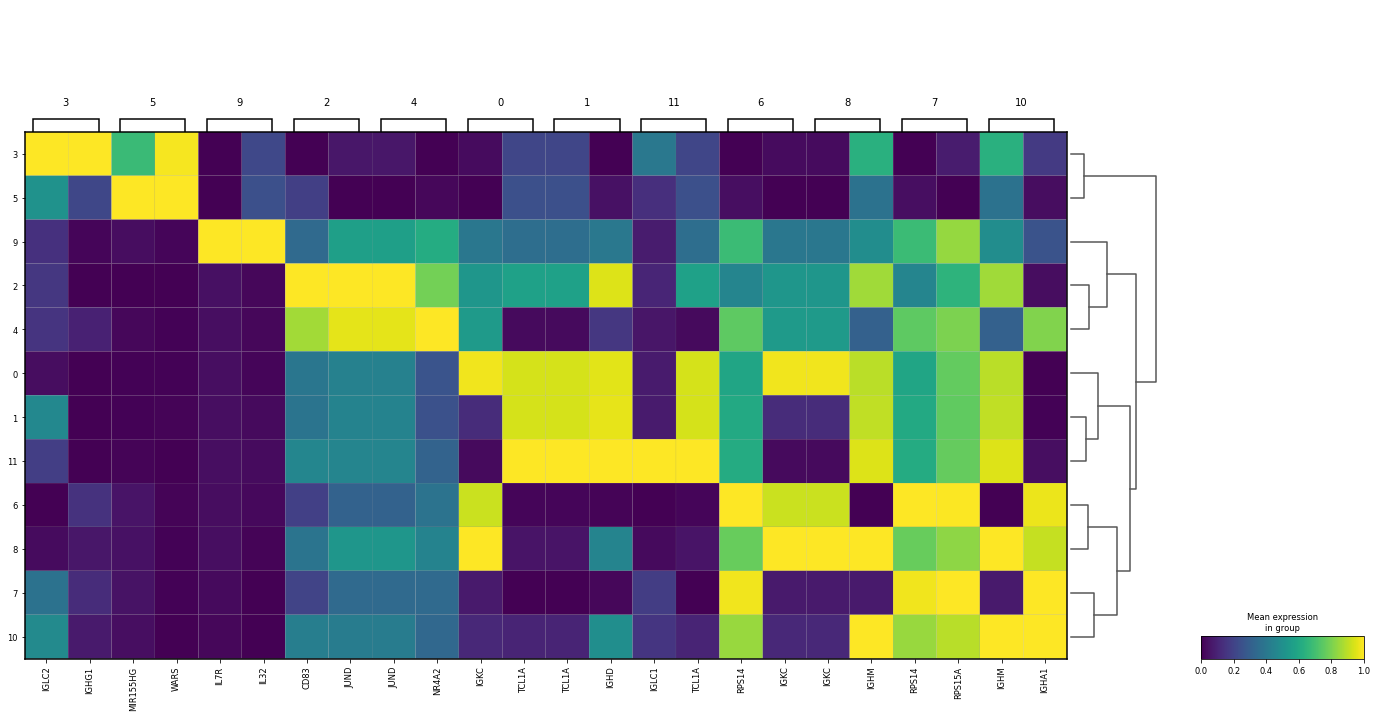

In [14]:
# matrix plot, n_genes=2

fig, ax = plt.subplots(1, 1, figsize=(24, 12))
sc.pl.rank_genes_groups_matrixplot(hy_bc, ax=ax, n_genes=2,use_raw=False,standard_scale="var")
fig.savefig("C:/Users/gperry/OneDrive - The Jackson Laboratory/Documents/GSBE Project - meeting recordings/figures/B-CellSubclusters/Bcell_Matrixplot_n2.png")


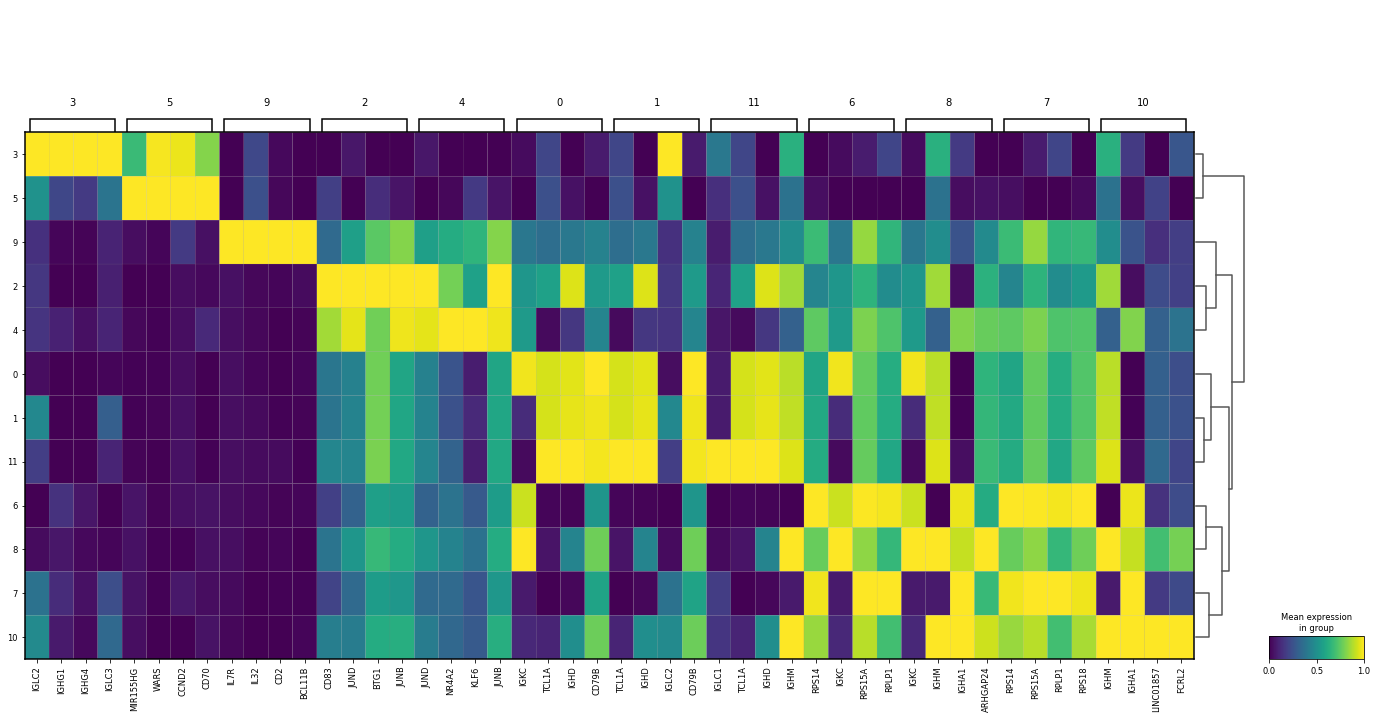

In [15]:
# matrix plot, n_genes=4

fig, ax = plt.subplots(1, 1, figsize=(24, 12))
sc.pl.rank_genes_groups_matrixplot(hy_bc, ax=ax, n_genes=4,use_raw=False,standard_scale="var")
fig.savefig("C:/Users/gperry/OneDrive - The Jackson Laboratory/Documents/GSBE Project - meeting recordings/figures/B-CellSubclusters/Bcell_Matrixplot_n4.png")


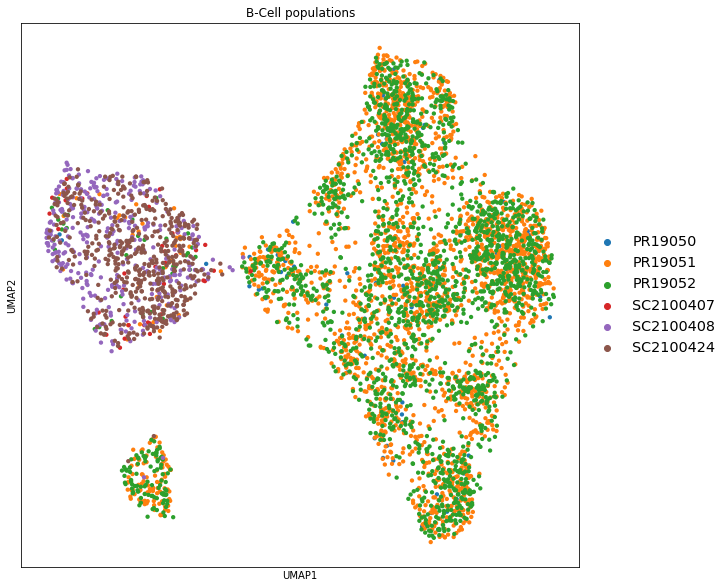

In [16]:

# check re-clustered leiden

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.umap(hy_bc, ax=ax, color="processed_id", legend_loc="right margin", legend_fontsize = "x-large", size=75, title ="B-Cell populations")


## Look for common b-cell markers and the number of cells expressing the markers in clusters

In [21]:
# sort df by grouping column
# a better way to check for common b-cell markers

markers = ["MS4A1", "CD72", "CD37", "CD79A", "CD79B","CD19"]
grouping_column = "leiden"
df = sc.get.obs_df(hy_bc, markers + [grouping_column])
cluster_lengths=df.groupby(grouping_column).size()
print(cluster_lengths)

df=df.sort_values(grouping_column,key=lambda z:z.astype(int))
for marker in markers:
    mean_value= df[[grouping_column,marker]].groupby(grouping_column).mean()
    mean_column=np.repeat(mean_value.values,cluster_lengths.values)
    df[f"{marker}_pos"]=df[marker]>=mean_column
    
#print(df)

#df.groupbyCD19_pos.sum()

leiden
0     904
1     679
2     629
3     499
4     491
5     466
6     398
7     306
8     280
9     196
10    146
11    128
dtype: int64


In [40]:
g = (df).groupby(grouping_column)
frac = lambda z: sum(z) / z.shape[0]
frac.__name__ = "pos_frac"
g.aggregate([sum, frac]).filter(like="_pos")

# sum is # of cells in each cluster

MS4A1_pos           CD72_pos           CD37_pos           CD79A_pos  \
             sum  pos_frac      sum  pos_frac      sum  pos_frac       sum   
leiden                                                                       
0            516  0.570796      482  0.533186      497  0.549779       508   
1            359  0.528719      352  0.518409      358  0.527246       362   
2            344  0.546900      335  0.532591      345  0.548490       342   
3            256  0.513026       78  0.156313      227  0.454910       223   
4            245  0.498982       99  0.201629      267  0.543788       268   
5            258  0.553648      103  0.221030      233  0.500000       237   
6            198  0.497487       54  0.135678      217  0.545226       227   
7            159  0.519608       46  0.150327      159  0.519608       155   
8            151  0.539286      119  0.425000      153  0.546429       150   
9            100  0.510204       84  0.428571      106  0.540816       107   
10            77  0.527397       76  0.520548       81  0.554795        71   
11            69  0.539062       65  0.507812       66  0.515625        68   

                 CD79B_pos           CD19_pos            
        pos_frac       sum  pos_frac      sum  pos_frac  
leiden                                                   
0       0.561947       499  0.551991      479  0.529867  
1       0.533137       371  0.546392      357  0.525773  
2       0.543720       332  0.527822      286  0.454690  
3       0.446894       206  0.412826      224  0.448898  
4       0.545825       261  0.531568      225  0.458248  
5       0.508584       176  0.377682      214  0.459227  
6       0.570352       205  0.515075      177  0.444724  
7       0.506536       168  0.549020      136  0.444444  
8       0.535714       149  0.532143      151  0.539286  
9       0.545918       101  0.515306       88  0.448980  
10      0.486301        81  0.554795       78  0.534247  
11      0.531250        70  0.546875       73  0.570312

In [20]:
df.groupby(["leiden", "CD79A_pos", "MS4A1_pos"]).size()

leiden  CD79A_pos  MS4A1_pos
0       False      False        172
                   True         224
        True       False        216
                   True         292
1       False      False        164
                   True         153
        True       False        156
                   True         206
2       False      False        131
                   True         156
        True       False        154
                   True         188
3       False      False        117
                   True         159
        True       False        126
                   True          97
4       False      False        100
                   True         123
        True       False        146
                   True         122
5       False      False        122
                   True         107
        True       False         86
                   True         151
6       False      False         90
                   True          81
        True       False        110

# Get significant genes in each cluster